In [115]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 업로드한 폰트 파일 경로 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"

# 폰트 파일을 fontManager에 등록
fm.fontManager.addfont(font_path)

# 폰트 내부의 실제 이름 확인 (예: 'Nanum Barun Gothic') 후, 전역 설정
plt.rcParams['font.family'] = 'Nanum Barun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이제부터 생성하는 모든 플롯에 대해 'Nanum Barun Gothic' 폰트가 기본값으로 사용됩니다.

In [ ]:
pip install folium

### 0. 회귀분석 파일 생성

In [10]:
import pandas as pd
from IPython.display import display

# 파일 경로
file_path = "/root/ML_method/[최종]전처리데이터_new.xlsx"

# 읽을 시트 목록과 평균값을 추가할 컬럼명 매핑
sheet_mapping = {
    "거주인구": "24_rePop",
    "의료시설": "24_medic",
    "주택매매": "24_housing_sales",
    "유동인구": "24_movingPop",
    "순유동인구": "24_netMovingPop"
}

# 엑셀 파일 로드
xls = pd.ExcelFile(file_path)

# ✅ 각 시트별 평균값 계산 및 컬럼 추가
updated_sheets = {}

for sheet, new_col in sheet_mapping.items():
    if sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet)

        # 🔹 2024년 1월~12월 컬럼만 선택 (_copy 제외)
        monthly_cols = [col for col in df.columns if "2024년" in col and "_copy" not in col]

        # 🔹 새로운 컬럼 추가 (각 행별 평균값)
        df[new_col] = df[monthly_cols].mean(axis=1)

        # 🔹 기존 데이터프레임에 새로운 컬럼 추가
        updated_sheets[sheet] = df

# ✅ 변환된 데이터 저장 및 확인
display(updated_sheets)

# ✅ CSV 파일로 저장 (한글 깨짐 방지)
for sheet_name, df in updated_sheets.items():
    output_file = f"/root/ML_method/{sheet_name}_processed.csv"
    df.to_csv(output_file, index=False, encoding="utf-8-sig")  # 🔹 UTF-8-SIG 적용
    print(f"📂 {sheet_name} 시트의 변환된 데이터가 {output_file} 파일로 저장되었습니다!")

{'거주인구':     start_station end_station purpose_area  purpose_area_num       lines  \
 0              능곡          대곡         녹지지역                 3   경의중앙선,서해선   
 1              망우          상봉         주거지역                 1   경의중앙선,경춘선   
 2             신도림         신설동         주거지역                 1         2호선   
 3              구로          인천         주거지역                 1         1호선   
 4              미금          정자         상업지역                 0  수인분당선,신분당선   
 ..            ...         ...          ...               ...         ...   
 741            강남          교대         주거지역                 1         2호선   
 742            가좌          서울         상업지역                 0       경의중앙선   
 743            성수          시청         상업지역                 0         2호선   
 744          건대입구          성수         공업지역                 2         2호선   
 745            서울          시청         상업지역                 0         1호선   
 
      weighted_average climate_pass      end_x       end_y end_dis

📂 거주인구 시트의 변환된 데이터가 /root/ML_method/거주인구_processed.csv 파일로 저장되었습니다!
📂 의료시설 시트의 변환된 데이터가 /root/ML_method/의료시설_processed.csv 파일로 저장되었습니다!
📂 주택매매 시트의 변환된 데이터가 /root/ML_method/주택매매_processed.csv 파일로 저장되었습니다!
📂 유동인구 시트의 변환된 데이터가 /root/ML_method/유동인구_processed.csv 파일로 저장되었습니다!
📂 순유동인구 시트의 변환된 데이터가 /root/ML_method/순유동인구_processed.csv 파일로 저장되었습니다!


In [9]:
import pandas as pd
from IPython.display import display

# 파일 경로
file_path = "/root/ML_method/[최종]전처리데이터_new.xlsx"

# 유지할 기존 컬럼 목록
base_columns = [
    "start_station", "end_station", "purpose_area", "purpose_area_num", "lines",
    "weighted_average", "climate_pass", "end_x", "end_y", "end_district",
    "end_line_num", "end_exit_num", "bus_stop_num"
]

# 읽을 시트 목록과 평균값을 추가할 컬럼명 매핑
sheet_mapping = {
    "거주인구": "24_rePop",
    "의료시설": "24_medic",
    "주택매매": "24_housing_sales",
    "유동인구": "24_movingPop",
    "순유동인구": "24_netMovingPop"
}

# 엑셀 파일 로드
xls = pd.ExcelFile(file_path)

# ✅ 기준이 될 데이터프레임 설정 (순유동인구 시트를 기준으로 함)
main_sheet = "순유동인구"
if main_sheet in xls.sheet_names:
    combined_df = pd.read_excel(xls, sheet_name=main_sheet)

    # 🔹 필요 없는 컬럼 (_copy 포함된 컬럼 삭제)
    combined_df = combined_df[[col for col in combined_df.columns if "_copy" not in col]]

    # 🔹 유지할 컬럼만 선택
    combined_df = combined_df[[col for col in base_columns if col in combined_df.columns]]
else:
    raise ValueError(f"❌ 기준 시트 '{main_sheet}'을 찾을 수 없습니다.")

# ✅ 각 시트별 평균값 계산 후 병합
for sheet, new_col in sheet_mapping.items():
    if sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet)

        # 🔹 2024년 1월~12월 컬럼만 선택 (_copy 제외)
        monthly_cols = [col for col in df.columns if "2024년" in col and "_copy" not in col]

        # 🔹 새로운 컬럼 추가 (각 행별 평균값)
        df[new_col] = df[monthly_cols].mean(axis=1)

        # 🔹 병합 기준 컬럼 (start_station, end_station)
        key_cols = ["start_station", "end_station"]

        # 🔹 기존 데이터프레임과 병합
        combined_df = pd.merge(combined_df, df[key_cols + [new_col]], on=key_cols, how="left")

# ✅ Jupyter Notebook에서 데이터 출력
display(combined_df)

# ✅ CSV 파일로 저장 (하나의 통합된 데이터)
output_file = "/root/ML_method/merged_processed_data.csv"
combined_df.to_csv(output_file, index=False)
print(f"📂 통합된 데이터가 {output_file} 파일로 저장되었습니다!")

,start_station,end_station,purpose_area,purpose_area_num,lines,weighted_average,climate_pass,end_x,end_y,end_district,end_line_num,end_exit_num,bus_stop_num,24_rePop,24_medic,24_housing_sales,24_movingPop,24_netMovingPop
0,의정부시청,흥선,주거지역,1,의정부선,4091.333333,X,37.743302,127.037023,경기도 의정부시,1,2,9,209750.500000,817.000000,474.090909,4488.583333,-166.750000
1,의정부중앙,흥선,주거지역,1,의정부선,3652.083333,X,37.743302,127.037023,경기도 의정부시,1,2,9,209750.500000,817.000000,474.090909,4488.583333,-166.750000
2,노들,흑석,주거지역,1,9호선,71548.625000,O,37.508770,126.963708,서울특별시 동작구,1,4,14,187335.750000,791.000000,367.545455,4528.500000,-234.583333
3,동작,흑석,주거지역,1,9호선,71041.250000,O,37.508770,126.963708,서울특별시 동작구,1,4,14,187335.750000,791.000000,367.545455,4528.500000,-234.583333
4,곡산,대곡,녹지지역,3,"서해선,경의중앙선",39077.500000,O,37.375115,126.483792,경기도 고양시,4,8,3,465390.750000,1844.000000,945.636364,10684.250000,-337.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,가락시장,경찰병원,주거지역,1,3호선,65128.750000,O,37.495918,127.124540,서울특별시 송파구,1,4,6,287165.500000,1661.000000,520.545455,7226.250000,-375.333333
1610,검바위,검암,주거지역,1,인천지하철 2호선,14596.833333,X,37.568660,126.675687,인천광역시 서구,2,3,12,269766.583333,835.000000,778.818182,6869.333333,687.333333
1611,개롱,거여,주거지역,1,5호선,27495.375000,O,37.493105,127.144150,서울특별시 송파구,1,8,10,287165.500000,1661.000000,520.545455,7226.250000,-375.333333
1612,가정,가정중앙시장,주거지역,1,인천지하철 2호선,7479.583333,X,37.517054,126.676672,인천광역시 서구,1,2,9,269766.583333,835.000000,778.818182,6869.333333,687.333333


📂 통합된 데이터가 /root/ML_method/merged_processed_data.csv 파일로 저장되었습니다!


### 1. 기초 통계량 + 분포 + 이상치

In [51]:
import pandas as pd

# 원본 파일과 새 파일 경로 지정
file_path = "/root/ML_method/[최종]전처리데이터.xlsx"
new_file_path = "/root/ML_method/[최종]전처리데이터_new.xlsx"

# 매핑 딕셔너리 정의
mapping = {
    "상업지역": 0,
    "주거지역": 1,
    "공업지역": 2,
    "녹지지역": 3,
    "관리지역": 4,
    "농림지역": 5,
    "개발제한구역": 6
}

# Excel 파일의 모든 시트를 읽어옴 (시트명을 key로 하는 dict)
sheets_dict = pd.read_excel(file_path, sheet_name=None)

for sheet_name, df in sheets_dict.items():
    # 혹시 모를 컬럼명 앞뒤 공백 제거 (예: " purpose_area ")
    df.columns = df.columns.str.strip()
    
    # 모든 시트에 대해 purpose_area_num 컬럼을 생성합니다.
    # 만약 해당 시트에 purpose_area 컬럼이 없으면, NaN으로 채워집니다.
    if "purpose_area" in df.columns:
        df["purpose_area_num"] = df["purpose_area"].map(mapping)
        
        # purpose_area 컬럼 바로 뒤에 purpose_area_num 컬럼을 배치하기 위해 컬럼 순서 재배열
        cols = list(df.columns)
        cols.remove("purpose_area_num")  # 새 컬럼 제거 후
        idx = cols.index("purpose_area")   # purpose_area 컬럼 인덱스 찾기
        cols.insert(idx + 1, "purpose_area_num")  # 그 뒤에 삽입
        df = df[cols]
    else:
        # purpose_area 컬럼이 없을 경우 purpose_area_num 컬럼을 추가 (NaN 값)
        df["purpose_area_num"] = pd.NA
    
    # 변경된 DataFrame을 dict에 다시 저장
    sheets_dict[sheet_name] = df

# 모든 시트를 새 Excel 파일에 저장
with pd.ExcelWriter(new_file_path, engine='openpyxl') as writer:
    for sheet_name, df in sheets_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("파일 저장 완료!")

파일 저장 완료!


In [44]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 업로드한 폰트 파일 경로 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"

# 폰트 파일을 fontManager에 등록
fm.fontManager.addfont(font_path)

# 폰트 내부의 실제 이름 확인 (예: 'Nanum Barun Gothic') 후, 전역 설정
plt.rcParams['font.family'] = 'Nanum Barun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이제부터 생성하는 모든 플롯에 대해 'Nanum Barun Gothic' 폰트가 기본값으로 사용됩니다.

In [35]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


count       738.000000
mean      75435.603207
std       97122.200533
min           0.000000
25%        9321.437500
50%       45110.937500
75%       99782.562500
max      644024.333333
Name: weighted_average, dtype: float64


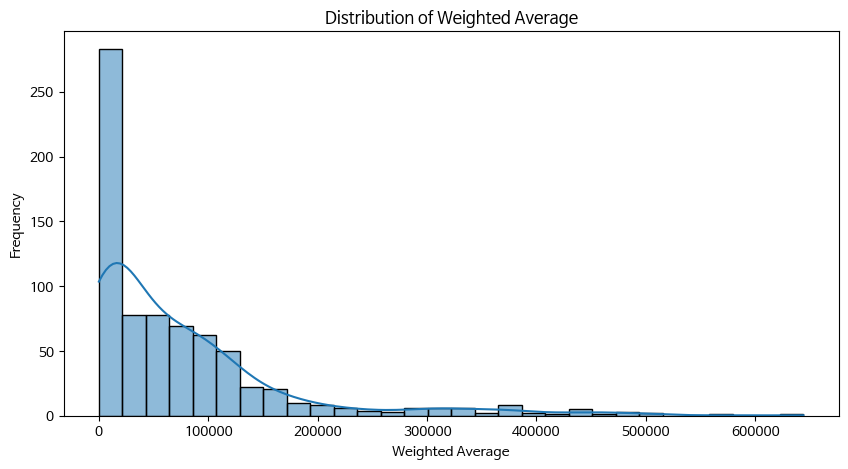

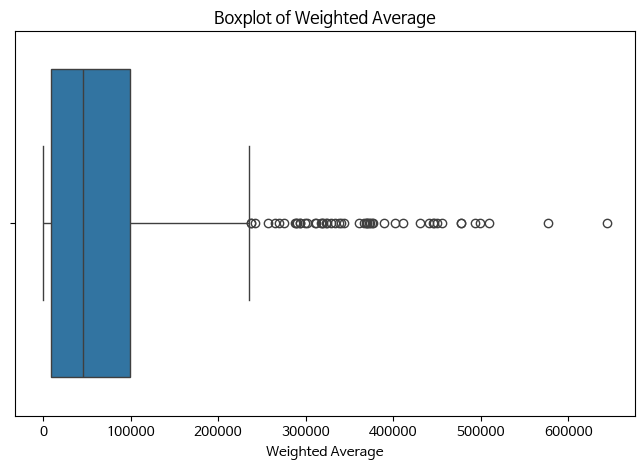

Detected Outliers:
    start_station end_station  weighted_average climate_pass
37             합정        홍대입구     343575.666667            O
46             당산          합정     340513.541667            O
51             뚝섬         한양대     269354.500000            O
52            왕십리         한양대     264885.250000            O
116            내방   총신대입구(이수)     293535.750000            O
117            동작   총신대입구(이수)     322869.750000            O
138            자양          청담     237268.125000            O
195            삼성       종합운동장     360807.000000            O
197          잠실새내       종합운동장     366640.250000            O
205            시청          종각     257459.083333            O
210           왕십리         청량리     317109.375000            O
233            잠실        잠실새내     368756.250000            O
234            강변        잠실나루     371978.000000            O
235            잠실        잠실나루     370137.250000            O
240          건대입구          자양     238130.375000            O
266  

In [72]:
# 각 시트별
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (파일 업로드 후 사용)
file_path = "/root/ML_method/[최종]전처리데이터_new.xlsx"  # 파일 경로 설정
df = pd.read_excel(file_path, sheet_name="순유동인구")  # 해당 시트명 사용

# 기술통계 계산
weighted_stats = df["weighted_average"].describe()
print(weighted_stats)

# 히스토그램 및 KDE 그래프 그리기
plt.figure(figsize=(10, 5))
sns.histplot(df["weighted_average"], bins=30, kde=True)
plt.xlabel("Weighted Average")
plt.ylabel("Frequency")
plt.title("Distribution of Weighted Average")
plt.show()

# 박스플롯을 이용한 이상치 탐지
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["weighted_average"])
plt.xlabel("Weighted Average")
plt.title("Boxplot of Weighted Average")
plt.show()

# IQR(Interquartile Range)을 이용한 이상치 탐지
Q1 = df["weighted_average"].quantile(0.25)
Q3 = df["weighted_average"].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터 필터링
outliers = df[(df["weighted_average"] < lower_bound) | 
              (df["weighted_average"] > upper_bound)]

# 원하는 열만 필터링해서 출력
filtered_outliers = outliers[['start_station', 'end_station', 'weighted_average', 'climate_pass']]

# 이상치 데이터 출력
print("Detected Outliers:")
# 출력할 최대 행 수를 크게 설정 (예: 1000)
pd.options.display.max_rows = None
# 모든 행 출력
print(filtered_outliers)

In [73]:
import pandas as pd

file_path = "/root/ML_method/[최종]전처리데이터_new.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)  # 시트명 확인

['거주인구', '의료시설', '주택매매', '유동인구', '순유동인구']


In [74]:
for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    print(f"▶ {sheet} 시트 기술통계:")
    print(df.describe(), "\n")

▶ 거주인구 시트 기술통계:
       purpose_area_num  weighted_average       end_x       end_y  \
count        738.000000        738.000000  738.000000  738.000000   
mean           1.296748      75613.921579   37.515760  126.964740   
std            1.117283      97282.940926    0.125163    0.176421   
min            0.000000          0.000000   36.990726  126.441442   
25%            1.000000       9321.437500   37.473703  126.857628   
50%            1.000000      45110.937500   37.522548  126.995925   
75%            1.000000     100948.156250   37.576083  127.070594   
max            6.000000     644024.333333   38.024580  127.629874   

       end_line_num  end_exit_num  bus_stop_num      2024년 01월      2024년 02월  \
count    738.000000    738.000000    738.000000     738.000000     738.000000   
mean       1.449864      5.140921      8.627371  221995.115176  222420.005420   
std        0.760851      3.211526      4.654775  110281.998879  110403.950711   
min        1.000000      0.000000     

In [55]:
for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    print(f"▶ {sheet} 시트 결측치 개수:")
    print(df.isnull().sum(), "\n")

▶ 거주인구 시트 결측치 개수:
start_station       0
end_station         0
purpose_area        0
purpose_area_num    0
lines               0
weighted_average    0
climate_pass        0
end_x               0
end_y               0
end_district        0
end_line_num        0
end_exit_num        0
bus_stop_num        0
2024년 01월           0
2024년 02월           0
2024년 03월           0
2024년 04월           0
2024년 05월           0
2024년 06월           0
2024년 07월           0
2024년 08월           0
2024년 09월           0
2024년 10월           0
2024년 11월           0
2024년 12월           0
2024년 01월_copy      0
2024년 02월_copy      0
2024년 03월_copy      0
2024년 04월_copy      0
2024년 05월_copy      0
2024년 06월_copy      0
2024년 07월_copy      0
2024년 08월_copy      0
2024년 09월_copy      0
2024년 10월_copy      0
2024년 11월_copy      0
2024년 12월_copy      0
dtype: int64 

▶ 의료시설 시트 결측치 개수:
start_station         0
end_station           0
purpose_area          0
purpose_area_num      0
lines                 0
weighted_averag

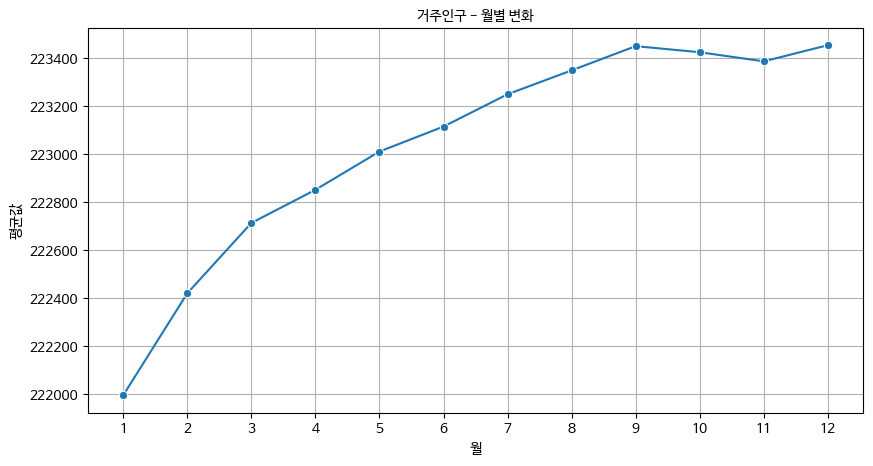

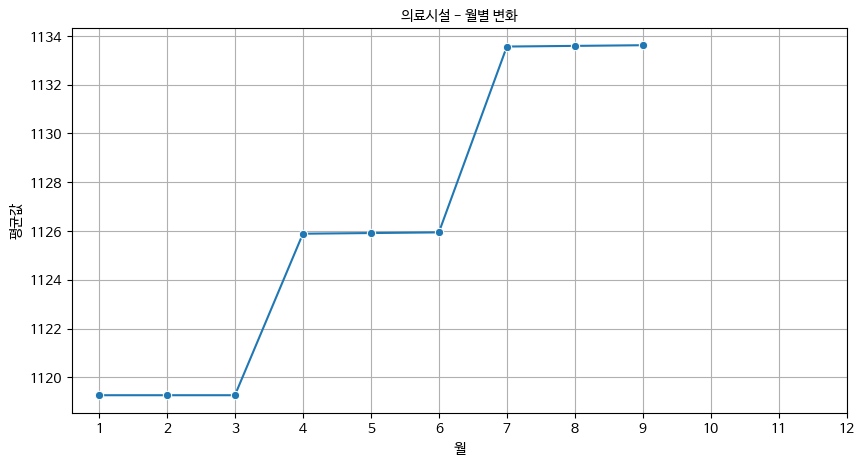

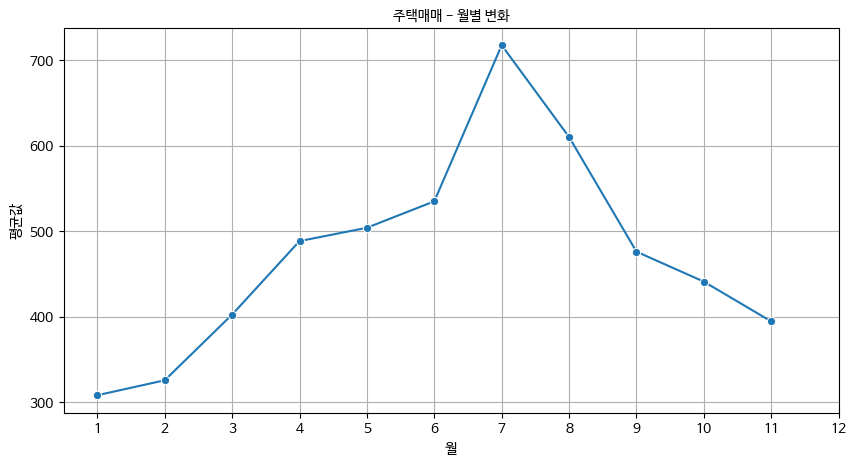

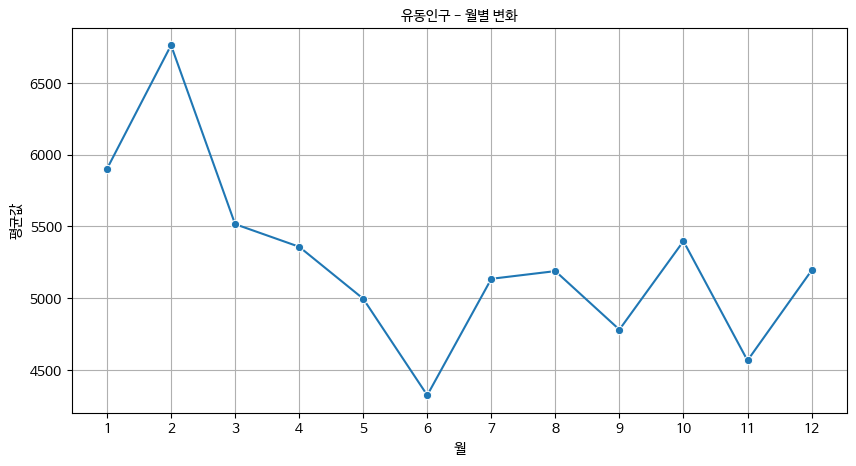

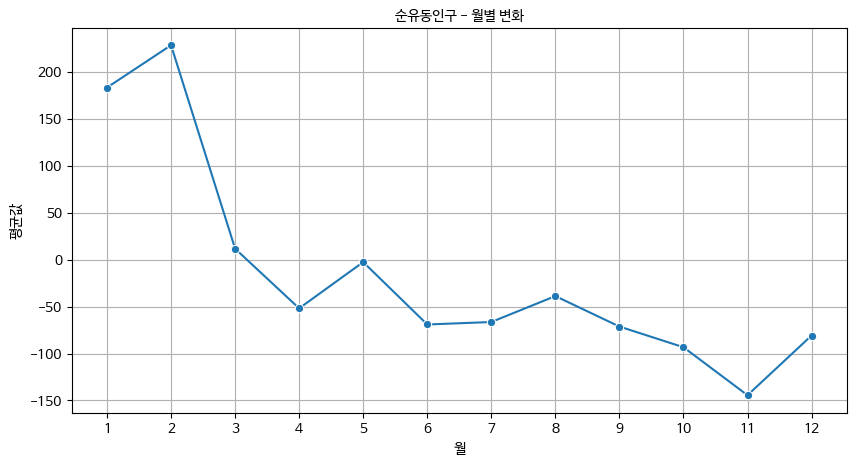

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# 🔹 한글 폰트 설정 (깨짐 방지)
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc("font", family=font_prop.get_name())  # 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 엑셀 파일 로드
file_path = "/root/ML_method/[최종]전처리데이터_new.xlsx"
xls = pd.ExcelFile(file_path)

# 🔹 월별 데이터를 분석할 열 필터링 함수 (_copy 제외)
def filter_monthly_columns(df):
    return df[[col for col in df.columns if "2024년" in col and "_copy" not in col]]

# 🔹 모든 시트에 대해 반복
for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    # 🔹 월별 열만 선택 (_copy 제거)
    df_monthly = filter_monthly_columns(df)
    
    # 🔹 월별 평균 계산 (열 기준)
    df_mean = df_monthly.mean(axis=0)

    # 🔹 x축을 날짜 형식으로 변환 (월 정보만 추출)
    months = df_mean.index.str.replace("2024년 ", "").str.replace("월", "").astype(int)

    # 🔹 그래프 그리기
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=months, y=df_mean.values, marker="o")
    plt.xticks(months)  # x축 월 설정
    plt.title(f"{sheet} - 월별 변화", fontproperties=font_prop)  # 제목에 한글 폰트 적용
    plt.xlabel("월", fontproperties=font_prop)
    plt.ylabel("평균값", fontproperties=font_prop)
    plt.grid(True)
    plt.show()

In [76]:
# 상관관계 확인
import pandas as pd

combined_df = pd.DataFrame()

for sheet in xls.sheet_names:
    # 각 시트의 데이터 불러오기
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    # weighted_average는 내림차순, end_station은 오름차순 정렬
    df = df.sort_values(by=['weighted_average', 'end_station'], ascending=[False, True])
    
    # 데이터셋 구분을 위한 Category 컬럼 추가
    df["Category"] = sheet
    
    # 결합 (인덱스 재설정)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 숫자형 데이터만 선택하여 상관행렬 계산 (numeric_only=True 사용)
corr_matrix = combined_df.corr(numeric_only=True)
print("▶ 전체 데이터셋 상관행렬:")
print(corr_matrix)

▶ 전체 데이터셋 상관행렬:
                  purpose_area_num  weighted_average     end_x     end_y  \
purpose_area_num          1.000000         -0.238560 -0.062769  0.102488   
weighted_average         -0.238560          1.000000  0.081665  0.081052   
end_x                    -0.062769          0.081665  1.000000  0.032356   
end_y                     0.102488          0.081052  0.032356  1.000000   
end_line_num              0.011939          0.214119  0.031465 -0.071689   
end_exit_num             -0.348172          0.422430  0.006066 -0.000967   
bus_stop_num             -0.260955          0.118319  0.126985 -0.055340   
2024년 01월                 0.010297         -0.046062 -0.082453 -0.015229   
2024년 02월                 0.010105         -0.045717 -0.082430 -0.014755   
2024년 03월                 0.010496         -0.046225 -0.081713 -0.015638   
2024년 04월                 0.010731         -0.046716 -0.082135 -0.015820   
2024년 05월                 0.010745         -0.046696 -0.082435 -0.015634

In [77]:
corr_matrix

,purpose_area_num,weighted_average,end_x,end_y,end_line_num,end_exit_num,bus_stop_num,2024년 01월,2024년 02월,2024년 03월,...,2024년 03월_copy,2024년 04월_copy,2024년 05월_copy,2024년 06월_copy,2024년 07월_copy,2024년 08월_copy,2024년 09월_copy,2024년 10월_copy,2024년 11월_copy,2024년 12월_copy
purpose_area_num,1.000000,-0.238560,-0.062769,0.102488,0.011939,-0.348172,-0.260955,0.010297,0.010105,0.010496,...,-0.309765,-0.254157,-0.254157,-0.254157,-0.254157,-0.251547,-0.251547,-0.251547,-0.214973,-0.214973
weighted_average,-0.238560,1.000000,0.081665,0.081052,0.214119,0.422430,0.118319,-0.046062,-0.045717,-0.046225,...,0.506210,0.487718,0.487718,0.487718,0.487718,0.475360,0.475360,0.475360,0.462149,0.462149
end_x,-0.062769,0.081665,1.000000,0.032356,0.031465,0.006066,0.126985,-0.082453,-0.082430,-0.081713,...,0.253760,0.279982,0.279982,0.279982,0.279982,0.305385,0.305385,0.305385,0.329786,0.329786
end_y,0.102488,0.081052,0.032356,1.000000,-0.071689,-0.000967,-0.055340,-0.015229,-0.014755,-0.015638,...,0.221280,0.174507,0.174507,0.174507,0.174507,0.200250,0.200250,0.200250,0.120886,0.120886
end_line_num,0.011939,0.214119,0.031465,-0.071689,1.000000,0.456443,0.064013,-0.013587,-0.013528,-0.013591,...,0.153498,0.204533,0.204533,0.204533,0.204533,0.197695,0.197695,0.197695,0.198458,0.198458
end_exit_num,-0.348172,0.422430,0.006066,-0.000967,0.456443,1.000000,0.289772,-0.020120,-0.019828,-0.020538,...,0.345020,0.330787,0.330787,0.330787,0.330787,0.323743,0.323743,0.323743,0.326900,0.326900
bus_stop_num,-0.260955,0.118319,0.126985,-0.055340,0.064013,0.289772,1.000000,-0.011632,-0.011702,-0.011445,...,0.182879,0.171565,0.171565,0.171565,0.171565,0.172798,0.172798,0.172798,0.121110,0.121110
2024년 01월,0.010297,-0.046062,-0.082453,-0.015229,-0.013587,-0.020120,-0.011632,1.000000,0.999985,0.999966,...,-0.075324,-0.074940,-0.074940,-0.074940,-0.074940,-0.076034,-0.076034,-0.076034,-0.051085,-0.051085
2024년 02월,0.010105,-0.045717,-0.082430,-0.014755,-0.013528,-0.019828,-0.011702,0.999985,1.000000,0.999955,...,-0.074393,-0.074053,-0.074053,-0.074053,-0.074053,-0.075196,-0.075196,-0.075196,-0.050249,-0.050249
2024년 03월,0.010496,-0.046225,-0.081713,-0.015638,-0.013591,-0.020538,-0.011445,0.999966,0.999955,1.000000,...,-0.075167,-0.074786,-0.074786,-0.074786,-0.074786,-0.075853,-0.075853,-0.075853,-0.050949,-0.050949


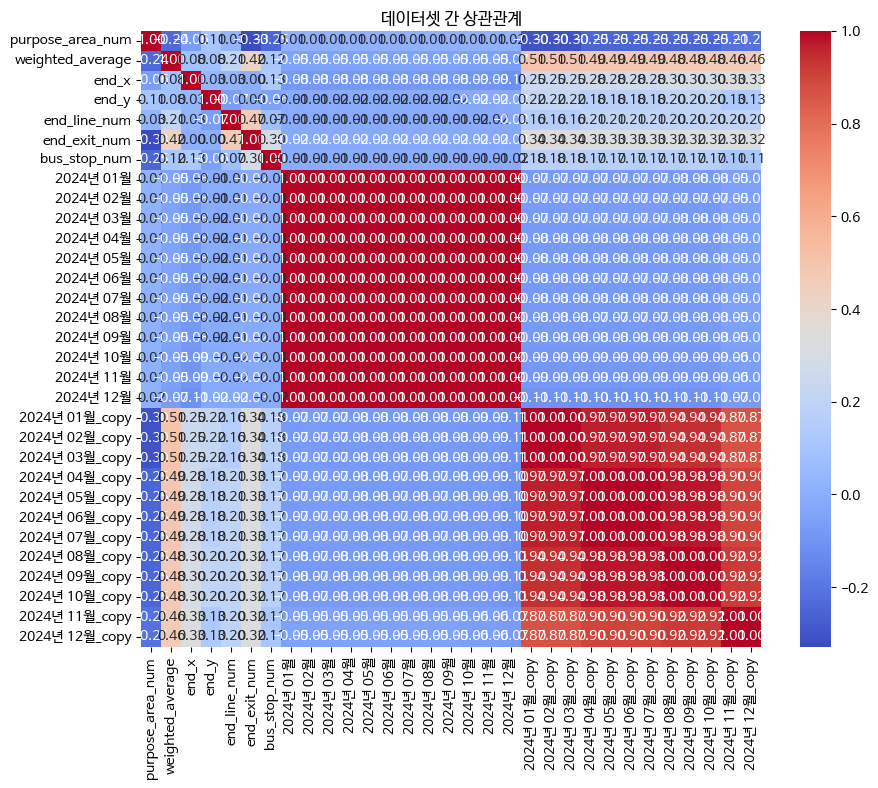

In [59]:
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("데이터셋 간 상관관계")
plt.show()

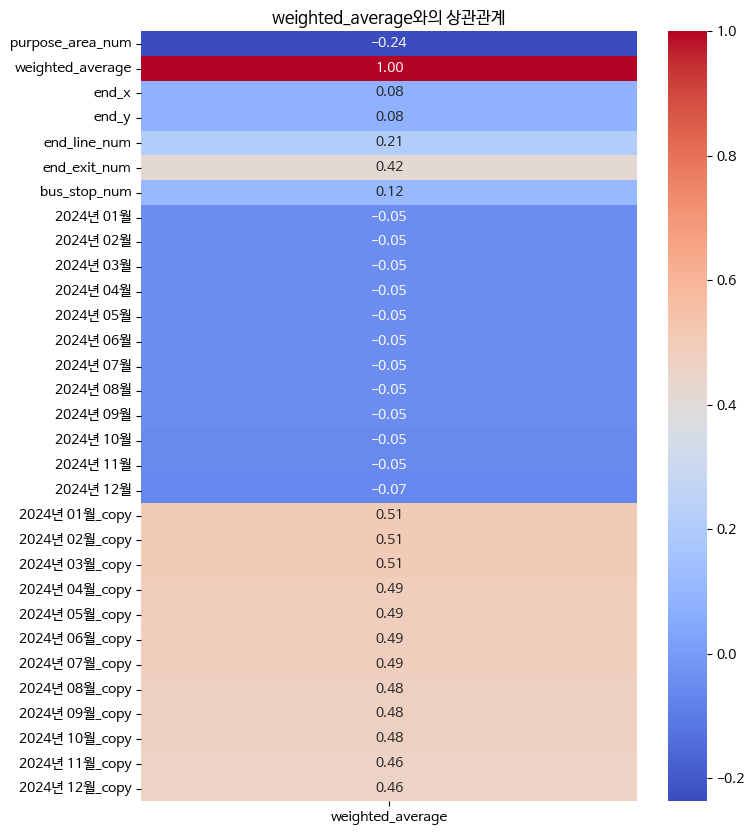

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# weighted_average와의 상관관계만 선택 (DataFrame 형태로 만듦)
weighted_corr = corr_matrix[['weighted_average']]

# 히트맵 시각화
plt.figure(figsize=(8, 10))
sns.heatmap(weighted_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("weighted_average와의 상관관계")
plt.show()

### 2. 선형 회귀 - y: weighted_average

In [15]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.2 MB/s eta 0:00:00 0:00:01


In [101]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 11.5 MB/s eta 0:00:0000:0100:01


In [43]:
import pandas as pd

# 파일 경로
file_path = "/root/ML_method/최종_회귀분석용_데이터.xlsx"

# 엑셀 파일 불러오기
df = pd.read_excel(file_path)

# 데이터 구조 확인
print(df.info())  # 데이터 타입 및 결측치 확인
print(df.describe())  # 기본 통계량 확인

# 결측치 확인
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_station     738 non-null    object 
 1   end_station       738 non-null    object 
 2   purpose_area      738 non-null    object 
 3   purpose_area_num  738 non-null    int64  
 4   lines             738 non-null    object 
 5   weighted_average  738 non-null    float64
 6   climate_pass      738 non-null    int64  
 7   end_x             738 non-null    float64
 8   end_y             738 non-null    float64
 9   end_district      738 non-null    object 
 10  end_line_num      738 non-null    int64  
 11  end_exit_num      738 non-null    int64  
 12  bus_stop_num      738 non-null    int64  
 13  24_rePop          738 non-null    float64
 14  24_medic          738 non-null    float64
 15  24_housing_sales  738 non-null    float64
 16  24_movingPop      738 non-null    float64
 1

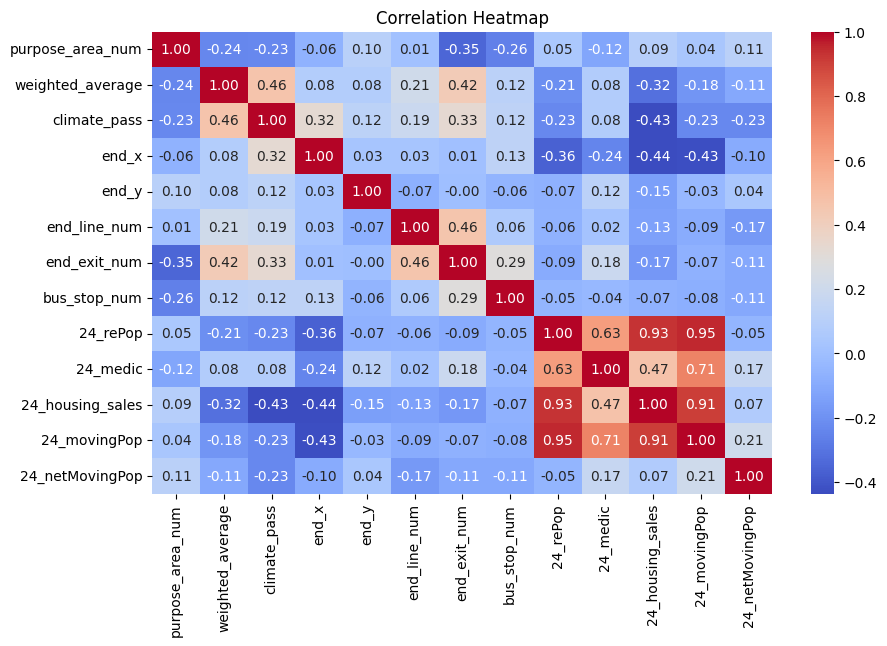

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 숫자형 데이터만 선택하여 상관 행렬 계산
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()

# 🔹 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [45]:
import pandas as pd
import statsmodels.api as sm

# 🔹 데이터 로드
file_path = "/root/ML_method/최종_회귀분석용_데이터.xlsx"
df = pd.read_excel(file_path)

# 🔹 숫자형 데이터만 선택 (문자열 제거)
df_numeric = df.select_dtypes(include=[float, int]).copy()

# 🔹 결측치 확인 후 제거
df_numeric = df_numeric.dropna()

# 🔹 독립변수(X)와 종속변수(y) 설정
X = df_numeric[['purpose_area_num', 'climate_pass', 'end_line_num', 
                'end_exit_num', 'bus_stop_num', '24_rePop', '24_medic', 
                '24_housing_sales', '24_movingPop', '24_netMovingPop']]
y = df_numeric['weighted_average']

# 🔹 상수항 추가 (회귀 분석에서 절편 포함)
X = sm.add_constant(X)

# 🔹 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 🔹 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     34.49
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.12e-55
Time:                        10:33:10   Log-Likelihood:                -9379.6
No. Observations:                 738   AIC:                         1.878e+04
Df Residuals:                     727   BIC:                         1.883e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.209e+04   1.33e+04  

In [46]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 (독립변수 X의 다중공선성 확인)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             Feature        VIF
0              const  19.958984
1   purpose_area_num   1.270787
2       climate_pass   1.900382
3       end_line_num   1.382827
4       end_exit_num   1.793035
5       bus_stop_num   1.164466
6           24_rePop  53.020176
7           24_medic   3.549809
8   24_housing_sales  17.306804
9       24_movingPop  52.402913
10   24_netMovingPop   4.302256


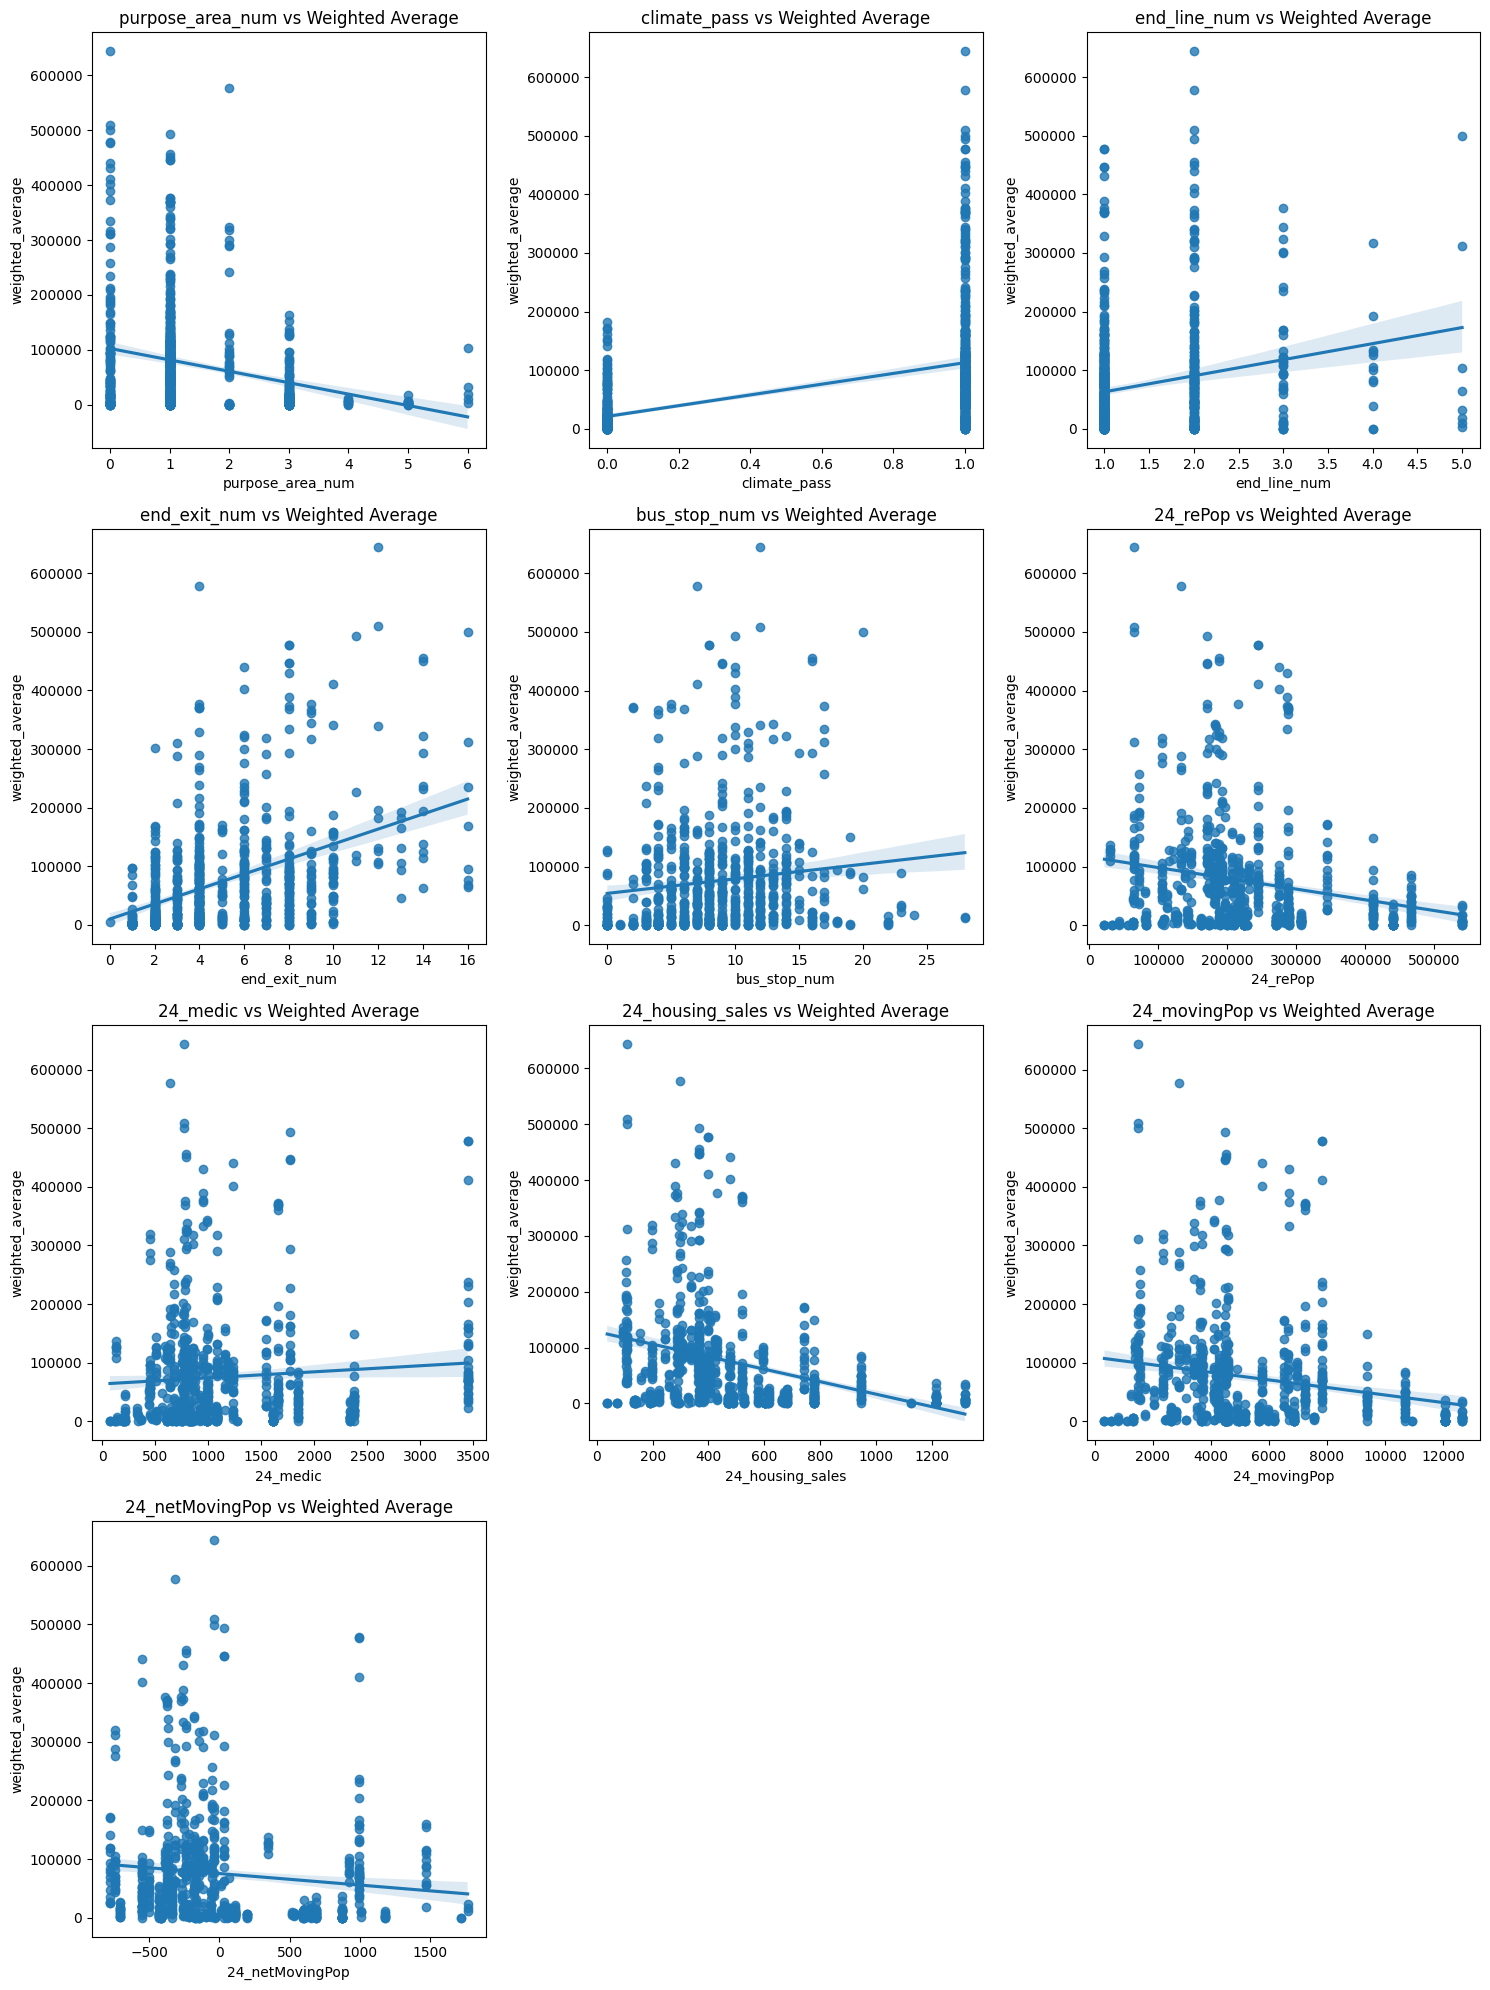

In [47]:
# weighted_average와 변수와의 관계
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 🔹 변수 목록
variables = ['purpose_area_num', 'climate_pass', 'end_line_num', 
             'end_exit_num', 'bus_stop_num', '24_rePop', '24_medic', 
             '24_housing_sales', '24_movingPop', '24_netMovingPop']

# 🔹 서브플롯 자동 크기 조정 (3열 기준)
cols = 3  # 열 개수
rows = math.ceil(len(variables) / cols)  # 자동 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))  # 동적 크기 조정
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱싱 쉽게 변경

# 🔹 각 변수별로 그래프 생성
for i, var in enumerate(variables):
    sns.regplot(x=df[var], y=df['weighted_average'], ax=axes[i])
    axes[i].set_title(f"{var} vs Weighted Average")

# 🔹 불필요한 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):  # 사용되지 않은 축 숨기기
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [48]:
# 다중공선성 해결 방법1-PCA (차원축소)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# 🔹 데이터 불러오기
file_path = "/root/ML_method/최종_회귀분석용_데이터.xlsx"
df = pd.read_excel(file_path)

# 🔹 숫자형 데이터만 선택
df_numeric = df.select_dtypes(include=[float, int]).dropna()

# 🔹 독립변수 (다중공선성이 높은 변수 포함)
X = df_numeric[['24_rePop', '24_movingPop', '24_housing_sales']]
y = df_numeric['weighted_average']

# 🔹 데이터 스케일링 (PCA 적용을 위해 평균=0, 분산=1로 정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 PCA 적용 (3개의 변수를 2개의 주성분으로 변환)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🔹 변환된 주성분을 데이터프레임으로 변환
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# 🔹 회귀 분석 수행 (PCA 적용한 데이터 사용)
X_pca_df = sm.add_constant(X_pca_df)  # 상수항 추가
model_pca = sm.OLS(y, X_pca_df).fit()

# 🔹 결과 출력
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     71.30
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           5.01e-29
Time:                        10:33:13   Log-Likelihood:                -9457.5
No. Observations:                 738   AIC:                         1.892e+04
Df Residuals:                     735   BIC:                         1.893e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.561e+04   3281.672     23.041      0.0

In [49]:
# 다중공선성 해결 방법2-릿지 회귀 (변수 제거 없이 다중공선성 해결)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 🔹 숫자형 데이터만 선택
df_numeric = df.select_dtypes(include=[float, int]).dropna()

# 🔹 독립변수 및 종속변수 설정
X = df_numeric[['purpose_area_num', 'climate_pass', 'end_line_num', 'end_exit_num', 
                'bus_stop_num', '24_rePop', '24_medic', '24_housing_sales', 
                '24_movingPop', '24_netMovingPop']]
y = df_numeric['weighted_average']

# 🔹 데이터 스케일링 (릿지 회귀 적용을 위해 정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 훈련 데이터 & 테스트 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 릿지 회귀 모델 학습 (alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 🔹 모델 성능 평가
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# 🔹 회귀 계수 출력
ridge_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})

print(f"🔹 Ridge Regression MSE: {mse:.4f}")
print(ridge_coefs)

🔹 Ridge Regression MSE: 5405145314.9317
            Feature   Coefficient
0  purpose_area_num  -7379.779073
1      climate_pass  24723.160452
2      end_line_num   1340.410537
3      end_exit_num  23278.422438
4      bus_stop_num   -945.079149
5          24_rePop -18135.300072
6          24_medic   4623.936911
7  24_housing_sales -27530.987754
8      24_movingPop  30613.219791
9   24_netMovingPop  -6599.772143


In [50]:
# 변수 선택

In [51]:
# 1. VIF 기반 제거 -기각
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성이 높은 변수 제거 함수
def remove_high_vif(X, threshold=10.0):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    while vif_data["VIF"].max() > threshold:  # 가장 높은 VIF 값이 기준 초과할 때 반복
        max_vif_feature = vif_data.sort_values("VIF", ascending=False).iloc[0]["Feature"]
        print(f"🔹 Removing '{max_vif_feature}' (VIF={vif_data['VIF'].max():.2f})")
        X = X.drop(columns=[max_vif_feature])
        
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return X

# 독립변수 선택 (다중공선성 제거 적용)
X_filtered = remove_high_vif(X)

# 새로운 회귀 분석 수행
X_filtered = sm.add_constant(X_filtered)  # 상수항 추가
model_vif = sm.OLS(y, X_filtered).fit()

# 결과 출력
print(model_vif.summary())

🔹 Removing '24_rePop' (VIF=262.70)
🔹 Removing '24_movingPop' (VIF=87.67)
                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     42.74
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           3.53e-56
Time:                        10:33:13   Log-Likelihood:                -9381.0
No. Observations:                 738   AIC:                         1.878e+04
Df Residuals:                     729   BIC:                         1.882e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [52]:
# 2. p-value 기반 변수 선택 - 기각
import statsmodels.api as sm

# 초기 변수 선택
X_selected = X.copy()

# p-value가 높은 변수 제거 함수
def backward_elimination(X, y, p_threshold=0.05):
    while True:
        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues[1:]  # const(절편) 제외
        
        max_p_value = p_values.max()
        if max_p_value > p_threshold:
            excluded_feature = p_values.idxmax()
            print(f"🔹 Removing '{excluded_feature}' (p-value={max_p_value:.4f})")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    
    return X

# p-value 기반 변수 선택
X_selected = backward_elimination(X_selected, y)

# 최종 회귀 분석
X_selected = sm.add_constant(X_selected)
model_pval = sm.OLS(y, X_selected).fit()

# 결과 출력
print(model_pval.summary())

🔹 Removing 'bus_stop_num' (p-value=0.7078)
🔹 Removing 'end_line_num' (p-value=0.5180)
🔹 Removing '24_medic' (p-value=0.3789)
🔹 Removing '24_rePop' (p-value=0.2013)
🔹 Removing '24_netMovingPop' (p-value=0.3123)
🔹 Removing 'purpose_area_num' (p-value=0.0667)
                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     84.24
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           7.29e-59
Time:                        10:33:13   Log-Likelihood:                -9383.3
No. Observations:                 738   AIC:                         1.878e+04
Df Residuals:                     733   BIC:                         1.880e+04
Df Model:                           4                                         
Covariance Type:            nonr

In [53]:
# 3. Recursive Feature Elimination (RFE) - 최적의 변수 개수 설정 - 완전 기각
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 사용
model = LinearRegression()

# RFE 적용 (최적의 변수 개수 선택)
selector = RFE(model, n_features_to_select=5)  # 최적의 변수 5개만 선택
X_rfe = selector.fit_transform(X, y)

# 선택된 변수 확인
selected_features = X.columns[selector.support_]
print(f"✅ Selected Features: {list(selected_features)}")

# 새로운 회귀 분석
X_rfe_df = pd.DataFrame(X_rfe, columns=selected_features)
X_rfe_df = sm.add_constant(X_rfe_df)
model_rfe = sm.OLS(y, X_rfe_df).fit()

# 결과 출력
print(model_rfe.summary())

✅ Selected Features: ['purpose_area_num', 'climate_pass', 'end_line_num', 'end_exit_num', 'bus_stop_num']
                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     62.79
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           1.62e-54
Time:                        10:33:13   Log-Likelihood:                -9391.2
No. Observations:                 738   AIC:                         1.879e+04
Df Residuals:                     732   BIC:                         1.882e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [54]:
# 4. 라쏘 회귀 - 기각(릿지 회귀보다 MSE가 큼)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (라쏘 회귀는 정규화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터 & 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso 회귀 모델 학습 (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# 선택된 변수 확인
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
selected_features = lasso_coefs[lasso_coefs['Coefficient'] != 0]
print("✅ Selected Features by Lasso Regression:")
print(selected_features)

# Lasso 결과 출력
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"🔹 Lasso Regression MSE: {mse:.4f}")

✅ Selected Features by Lasso Regression:
            Feature   Coefficient
0  purpose_area_num  -7327.746772
1      climate_pass  24544.440934
2      end_line_num   1364.344529
3      end_exit_num  23218.447961
4      bus_stop_num   -880.641035
5          24_rePop -21504.541348
6          24_medic   4168.683307
7  24_housing_sales -28089.060389
8      24_movingPop  34861.900426
9   24_netMovingPop  -7587.244569
🔹 Lasso Regression MSE: 5404319117.6079


In [55]:
# 5.순차적 변수 선택
import statsmodels.api as sm
from itertools import combinations

def forward_selection(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        p_values = {}
        
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            p_values[feature] = model.pvalues[feature]

        best_feature = min(p_values, key=p_values.get)
        if p_values[best_feature] < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"✅ Added: {best_feature} (p={p_values[best_feature]:.4f})")
        else:
            break
    
    return selected_features

# 실행
selected_features = forward_selection(X, y)

# 최종 모델 적합
X_selected = sm.add_constant(X[selected_features])
model_fs = sm.OLS(y, X_selected).fit()

# 결과 출력
print(model_fs.summary())

✅ Added: climate_pass (p=0.0000)
✅ Added: end_exit_num (p=0.0000)
✅ Added: 24_housing_sales (p=0.0001)
✅ Added: 24_medic (p=0.0138)
                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     84.63
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.30e-59
Time:                        10:33:13   Log-Likelihood:                -9382.8
No. Observations:                 738   AIC:                         1.878e+04
Df Residuals:                     733   BIC:                         1.880e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      

In [56]:
# 6. 역방향 변수 선택 
def backward_elimination(X, y, significance_level=0.05):
    selected_features = list(X.columns)
    
    while len(selected_features) > 0:
        X_with_const = sm.add_constant(X[selected_features])
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues[1:]  # const(절편) 제외
        
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            selected_features.remove(excluded_feature)
            print(f"❌ Removed: {excluded_feature} (p={max_p_value:.4f})")
        else:
            break
    
    return selected_features

# 실행
selected_features = backward_elimination(X, y)

# 최종 모델 적합
X_selected = sm.add_constant(X[selected_features])
model_bs = sm.OLS(y, X_selected).fit()

# 결과 출력
print(model_bs.summary())

❌ Removed: bus_stop_num (p=0.7078)
❌ Removed: end_line_num (p=0.5180)
❌ Removed: 24_medic (p=0.3789)
❌ Removed: 24_rePop (p=0.2013)
❌ Removed: 24_netMovingPop (p=0.3123)
❌ Removed: purpose_area_num (p=0.0667)
                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     84.24
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           7.29e-59
Time:                        10:33:13   Log-Likelihood:                -9383.3
No. Observations:                 738   AIC:                         1.878e+04
Df Residuals:                     733   BIC:                         1.880e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
 

In [57]:
# 7. 단계적 변수 선택
def stepwise_selection(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        p_values = {}

        # Forward Selection: 새로운 변수 추가
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            p_values[feature] = model.pvalues[feature]

        best_feature = min(p_values, key=p_values.get)
        if p_values[best_feature] < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"✅ Added: {best_feature} (p={p_values[best_feature]:.4f})")

            # Backward Elimination: 기존 변수가 다시 불필요한지 확인
            while len(selected_features) > 1:
                model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
                p_values = model.pvalues[1:]  # const 제외
                max_p_value = p_values.max()
                if max_p_value > significance_level:
                    removed_feature = p_values.idxmax()
                    selected_features.remove(removed_feature)
                    print(f"❌ Removed: {removed_feature} (p={max_p_value:.4f})")
                else:
                    break
        else:
            break

    return selected_features

# 실행
selected_features = stepwise_selection(X, y)

# 최종 모델 적합
X_selected = sm.add_constant(X[selected_features])
model_stepwise = sm.OLS(y, X_selected).fit()

# 결과 출력
print(model_stepwise.summary())

✅ Added: climate_pass (p=0.0000)
✅ Added: end_exit_num (p=0.0000)
✅ Added: 24_housing_sales (p=0.0001)
✅ Added: 24_medic (p=0.0138)
                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     84.63
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.30e-59
Time:                        10:33:13   Log-Likelihood:                -9382.8
No. Observations:                 738   AIC:                         1.878e+04
Df Residuals:                     733   BIC:                         1.880e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      

In [58]:
# 모델 비교

In [59]:
# AIC / BIC 비교 (모델 복잡도 고려)
import statsmodels.api as sm

# 일반 회귀 (OLS) 모델
X_ols = sm.add_constant(X)  
model_ols = sm.OLS(y, X_ols).fit()

# VIF 제거 모델
X_vif = sm.add_constant(X_filtered)
model_vif = sm.OLS(y, X_vif).fit()

# 순방향 선택 모델
X_fs = sm.add_constant(X_selected)  
model_fs = sm.OLS(y, X_fs).fit()

# 역방향 선택 모델
X_bs = sm.add_constant(X_selected)  
model_bs = sm.OLS(y, X_bs).fit()

# 단계적 선택 모델
X_stepwise = sm.add_constant(X_selected)  
model_stepwise = sm.OLS(y, X_stepwise).fit()

# AIC / BIC 비교 및 AIC/BIC 비율 추가
print(f"일반 회귀(OLS): AIC={model_ols.aic:.2f}, BIC={model_ols.bic:.2f}, AIC/BIC={model_ols.aic / model_ols.bic:.4f}")
print(f"VIF 제거: AIC={model_vif.aic:.2f}, BIC={model_vif.bic:.2f}, AIC/BIC={model_vif.aic / model_vif.bic:.4f}")
print(f"순방향 선택: AIC={model_fs.aic:.2f}, BIC={model_fs.bic:.2f}, AIC/BIC={model_fs.aic / model_fs.bic:.4f}")
print(f"역방향 선택: AIC={model_bs.aic:.2f}, BIC={model_bs.bic:.2f}, AIC/BIC={model_bs.aic / model_bs.bic:.4f}")
print(f"단계적 선택: AIC={model_stepwise.aic:.2f}, BIC={model_stepwise.bic:.2f}, AIC/BIC={model_stepwise.aic / model_stepwise.bic:.4f}")

일반 회귀(OLS): AIC=18781.21, BIC=18831.85, AIC/BIC=0.9973
VIF 제거: AIC=18779.92, BIC=18821.35, AIC/BIC=0.9978
순방향 선택: AIC=18775.57, BIC=18798.59, AIC/BIC=0.9988
역방향 선택: AIC=18775.57, BIC=18798.59, AIC/BIC=0.9988
단계적 선택: AIC=18775.57, BIC=18798.59, AIC/BIC=0.9988


In [60]:
#  MSE (평균제곱오차) 비교 (예측 성능 고려)
from sklearn.metrics import mean_squared_error

y_pred_ols = model_ols.predict(sm.add_constant(X))  # 일반 회귀
y_pred_vif = model_vif.predict(sm.add_constant(X_filtered))
y_pred_fs = model_fs.predict(sm.add_constant(X_selected))
y_pred_bs = model_bs.predict(sm.add_constant(X_selected))
y_pred_stepwise = model_stepwise.predict(sm.add_constant(X_selected))

mse_ols = mean_squared_error(y, y_pred_ols)
mse_vif = mean_squared_error(y, y_pred_vif)
mse_fs = mean_squared_error(y, y_pred_fs)
mse_bs = mean_squared_error(y, y_pred_bs)
mse_stepwise = mean_squared_error(y, y_pred_stepwise)

print(f"일반 회귀(OLS) MSE: {mse_ols:.2f}")
print(f"VIF 제거 MSE: {mse_vif:.2f}")
print(f"순방향 선택 MSE: {mse_fs:.2f}")
print(f"역방향 선택 MSE: {mse_bs:.2f}")
print(f"단계적 선택 MSE: {mse_stepwise:.2f}")

일반 회귀(OLS) MSE: 6409843910.56
VIF 제거 MSE: 6433423632.57
순방향 선택 MSE: 6465334933.88
역방향 선택 MSE: 6465334933.88
단계적 선택 MSE: 6465334933.88


### 모델 MSE 비교

In [85]:
# 릿지 회귀
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 🔹 데이터 스케일링 (릿지 회귀는 정규화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 훈련 데이터 & 테스트 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 릿지 회귀 모델 학습 (alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 🔹 모델 성능 평가
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 🔹 회귀 계수 출력
ridge_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})

print(f"🔹 Ridge Regression MSE: {mse_ridge:.4f}")
print(ridge_coefs)

🔹 Ridge Regression MSE: 5405145314.9317
            Feature   Coefficient
0  purpose_area_num  -7379.779073
1      climate_pass  24723.160452
2      end_line_num   1340.410537
3      end_exit_num  23278.422438
4      bus_stop_num   -945.079149
5          24_rePop -18135.300072
6          24_medic   4623.936911
7  24_housing_sales -27530.987754
8      24_movingPop  30613.219791
9   24_netMovingPop  -6599.772143


In [86]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

# 🔹 라쏘 회귀 모델 학습 (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# 🔹 모델 성능 평가
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# 🔹 회귀 계수 출력
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

print(f"🔹 Lasso Regression MSE: {mse_lasso:.4f}")
print(lasso_coefs)

🔹 Lasso Regression MSE: 5404319117.6079
            Feature   Coefficient
0  purpose_area_num  -7327.746772
1      climate_pass  24544.440934
2      end_line_num   1364.344529
3      end_exit_num  23218.447961
4      bus_stop_num   -880.641035
5          24_rePop -21504.541348
6          24_medic   4168.683307
7  24_housing_sales -28089.060389
8      24_movingPop  34861.900426
9   24_netMovingPop  -7587.244569


In [87]:
# 랜덤 포레스트 회귀
from sklearn.ensemble import RandomForestRegressor

# 🔹 랜덤 포레스트 회귀 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔹 모델 성능 평가
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 🔹 변수 중요도 출력
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print(f"🔹 Random Forest Regression MSE: {mse_rf:.4f}")
print(feature_importances)

🔹 Random Forest Regression MSE: 2450771513.5870
            Feature  Importance
1      climate_pass    0.227763
4      bus_stop_num    0.177104
3      end_exit_num    0.166432
9   24_netMovingPop    0.093151
0  purpose_area_num    0.090689
7  24_housing_sales    0.066937
5          24_rePop    0.053520
6          24_medic    0.049298
8      24_movingPop    0.045206
2      end_line_num    0.029901


In [88]:
print(f"🔹 Ridge Regression MSE: {mse_ridge:.4f}")
print(f"🔹 Lasso Regression MSE: {mse_lasso:.4f}")
print(f"🔹 Random Forest Regression MSE: {mse_rf:.4f}")

# 가장 낮은 MSE 모델 선택
best_model = min(
    [('Ridge', mse_ridge), ('Lasso', mse_lasso), ('RandomForest', mse_rf)],
    key=lambda x: x[1]
)

print(f"✅ Best Model: {best_model[0]} with MSE={best_model[1]:.4f}")

🔹 Ridge Regression MSE: 5405145314.9317
🔹 Lasso Regression MSE: 5404319117.6079
🔹 Random Forest Regression MSE: 2450771513.5870
✅ Best Model: RandomForest with MSE=2450771513.5870


In [89]:
from sklearn.metrics import r2_score

# R² 계산
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🔹 Random Forest Regression R²: {r2_rf:.4f}")

🔹 Random Forest Regression R²: 0.7069


In [ ]:
# 🔹 원하는 설명변수(X) 직접 지정
X_new = df[['climate_pass', 'end_exit_num', 'bus_stop_num', 
            #'24_rePop', '24_medic', 'purpose_area_num',
             '24_housing_sales', '24_netMovingPop']]

# 🔹 데이터 스케일링 (랜덤 포레스트에는 필수는 아니지만 권장됨)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# 🔹 데이터 분할 (훈련/테스트 8:2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 랜덤 포레스트 회귀 모델 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_new.fit(X_train, y_train)

# 🔹 모델 성능 평가
y_pred_rf_new= rf_new.predict(X_test)
mse_rf_new = mean_squared_error(y_test, y_pred_rf)

# 🔹 변수 중요도 출력
feature_importances = pd.DataFrame({'Feature': X_new.columns, 'Importance': rf_new.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print(f"🔹 Random Forest Regression MSE: {mse_rf_new:.4f}")
print(feature_importances)

### ✅ 변수 중요도를 해석하여 주요 변수(climate_pass, bus_stop_num, end_exit_num)를 분석

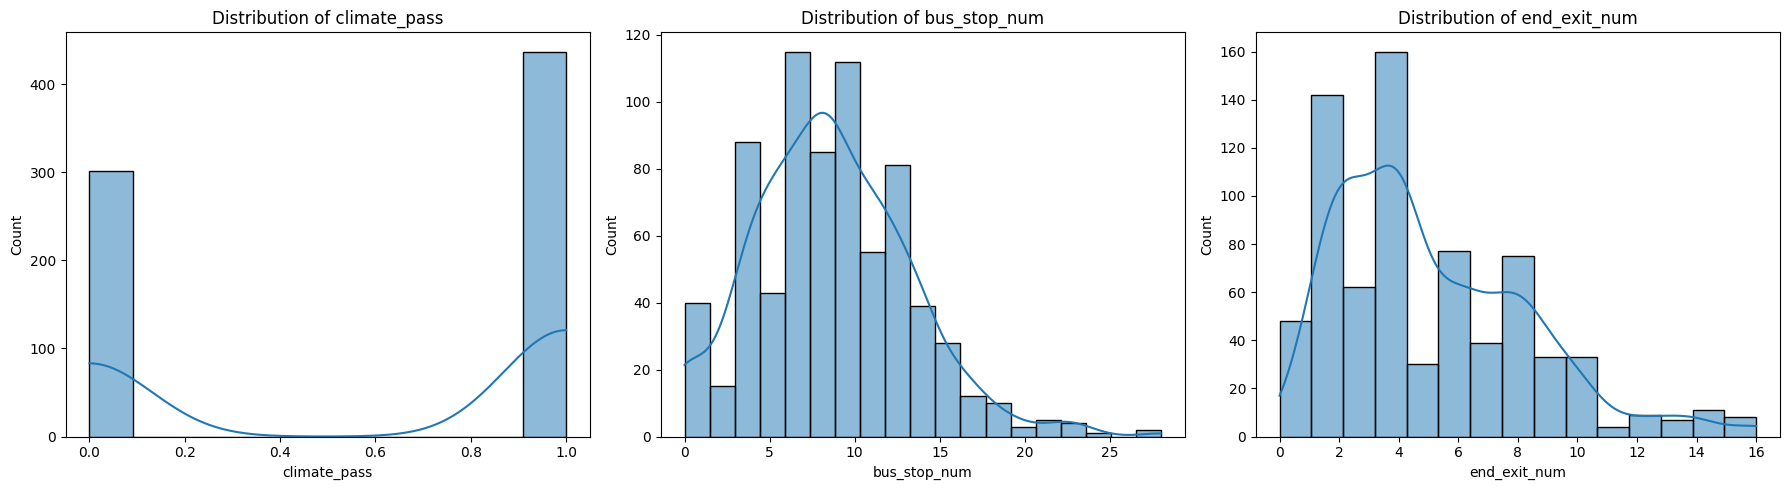

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 주요 변수 목록
important_features = ['climate_pass', 'bus_stop_num', 'end_exit_num']

# 🔹 히스토그램 & KDE(커널 밀도 함수) 그래프
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(important_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

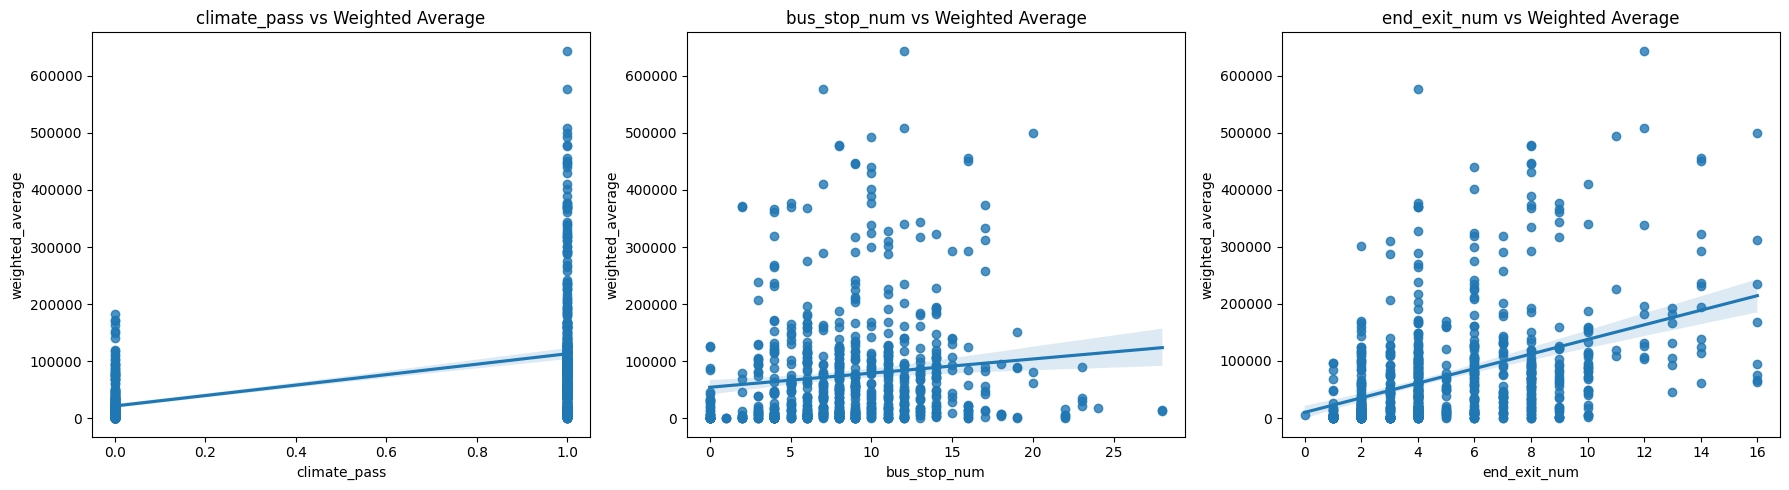

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(important_features):
    sns.regplot(x=df[feature], y=df['weighted_average'], ax=axes[i])
    axes[i].set_title(f"{feature} vs Weighted Average")

plt.tight_layout()
plt.show()

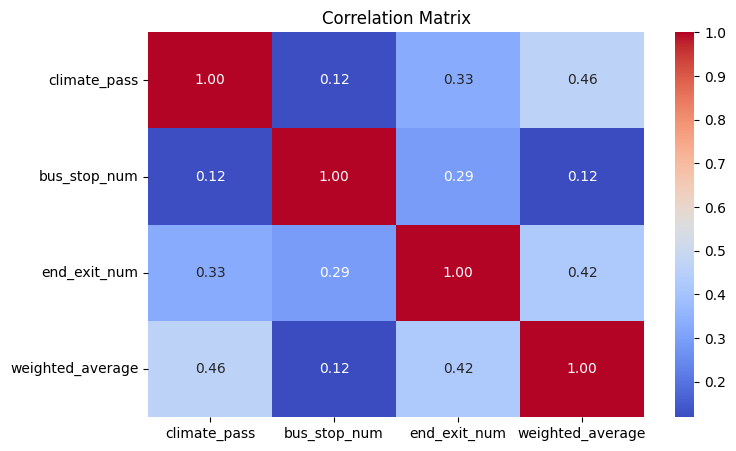

In [69]:
# 🔹 주요 변수 + 종속 변수만 포함한 데이터셋
corr_data = df[important_features + ['weighted_average']]

# 🔹 상관 행렬 계산
corr_matrix = corr_data.corr()

# 🔹 상관 행렬 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/tmp/ipykernel_4412/678960558.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(f'{feature}_bins')['weighted_average'].mean()
/tmp/ipykernel_4412/678960558.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(f'{feature}_bins')['weighted_average'].mean()
/tmp/ipykernel_4412/678960558.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(f'{fe

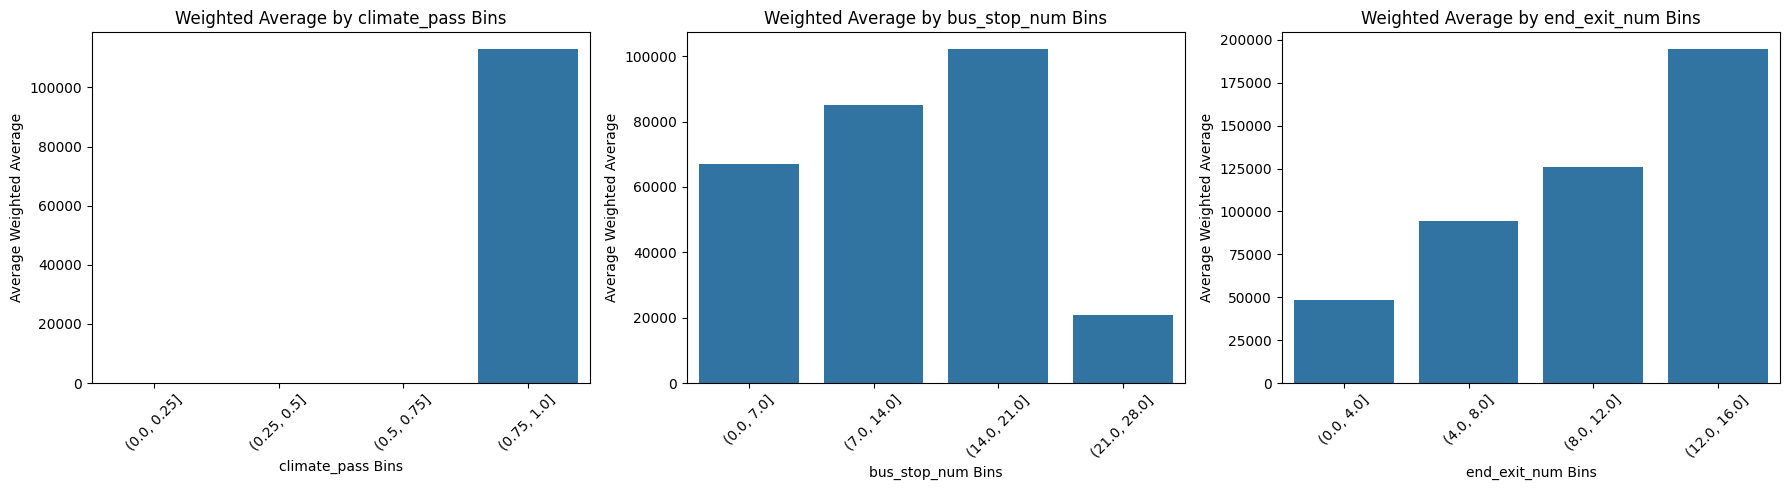

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 주요 변수 리스트
important_features = ['climate_pass', 'bus_stop_num', 'end_exit_num']

# 🔹 서브플롯 생성 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(important_features):
    # 🔹 변수 구간화 (bins=5)
    df[f'{feature}_bins'] = pd.cut(df[feature], bins=np.linspace(df[feature].min(), df[feature].max(), 5))

    # 🔹 구간별 평균 weighted_average 계산
    grouped_data = df.groupby(f'{feature}_bins')['weighted_average'].mean()

    # 🔹 막대 그래프 시각화
    sns.barplot(x=grouped_data.index.astype(str), y=grouped_data.values, ax=axes[i])
    axes[i].set_title(f"Weighted Average by {feature} Bins")
    axes[i].set_xlabel(f"{feature} Bins")
    axes[i].set_ylabel("Average Weighted Average")
    axes[i].tick_params(axis='x', rotation=45)  # x축 레이블 회전

plt.tight_layout()
plt.show()

In [91]:
# p-value값 < 0.05만 보고 일단 유의미한 값인지 확인

import statsmodels.api as sm

# 🔹 주요 변수만 선택
X_selected = df[['climate_pass', 'bus_stop_num', 'end_exit_num']]
X_selected = sm.add_constant(X_selected)  # 상수항 추가

# 🔹 회귀 모델 적합
model = sm.OLS(df['weighted_average'], X_selected).fit()

# 🔹 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       weighted_average   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           1.04e-55
Time:                        10:56:13   Log-Likelihood:                -9393.1
No. Observations:                 738   AIC:                         1.879e+04
Df Residuals:                     734   BIC:                         1.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.204e+04   7449.890     -1.617   

### 여러 비선형 모델 비교

In [94]:
import pandas as pd

# 파일 경로 설정
file_path = "/root/ML_method/최종_회귀분석용_데이터.xlsx"

# 데이터 불러오기 (첫 번째 시트 사용)
df = pd.read_excel(file_path)

# 데이터 확인
#print("🔹 데이터 샘플:")
#print(df.head())

# 🔹 컬럼 정보 확인
print("\n🔹 데이터 컬럼 목록:")
print(df.columns)


🔹 데이터 컬럼 목록:
Index(['start_station', 'end_station', 'purpose_area', 'purpose_area_num',
       'lines', 'weighted_average', 'climate_pass', 'end_x', 'end_y',
       'end_district', 'end_line_num', 'end_exit_num', 'bus_stop_num',
       '24_rePop', '24_medic', '24_housing_sales', '24_movingPop',
       '24_netMovingPop'],
      dtype='object')


In [95]:
# 🔹 종속 변수 (예측 대상)
y = df['weighted_average']

# 🔹 독립 변수 (설명 변수) 설정
X = df[['purpose_area_num', 'climate_pass', 'end_line_num', 'end_exit_num', 
                'bus_stop_num', '24_rePop', '24_medic', '24_housing_sales', 
                '24_movingPop', '24_netMovingPop']]

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🔹 데이터 스케일링 (랜덤 포레스트/XGBoost에는 필수 아님, 다항 회귀 및 신경망에는 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 훈련 데이터 & 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 랜덤 포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔹 예측 및 성능 평가
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🔹 Random Forest Regression MSE: {mse_rf:.4f}")
print(f"🔹 Random Forest Regression R²: {r2_rf:.4f}")

🔹 Random Forest Regression MSE: 2450771513.5870
🔹 Random Forest Regression R²: 0.7069


In [102]:
from xgboost import XGBRegressor

# 🔹 XGBoost 모델 학습
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# 🔹 예측 및 성능 평가
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔹 XGBoost Regression MSE: {mse_xgb:.4f}")
print(f"🔹 XGBoost Regression R²: {r2_xgb:.4f}")

🔹 XGBoost Regression MSE: 2696867415.7489
🔹 XGBoost Regression R²: 0.6774


In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 🔹 다항식 변환 (2차항 적용)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 🔹 데이터 분리
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 🔹 선형 회귀 모델 적용
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# 🔹 예측 및 성능 평가
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"🔹 Polynomial Regression (Degree=2) MSE: {mse_poly:.4f}")
print(f"🔹 Polynomial Regression (Degree=2) R²: {r2_poly:.4f}")

🔹 Polynomial Regression (Degree=2) MSE: 4858545181.3164
🔹 Polynomial Regression (Degree=2) R²: 0.4189


In [100]:
from sklearn.neural_network import MLPRegressor

# 🔹 신경망 모델 학습
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# 🔹 예측 및 성능 평가
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"🔹 Neural Network (MLP) Regression MSE: {mse_mlp:.4f}")
print(f"🔹 Neural Network (MLP) Regression R²: {r2_mlp:.4f}")

🔹 Neural Network (MLP) Regression MSE: 6269257639.3138
🔹 Neural Network (MLP) Regression R²: 0.2502


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [103]:
# 🔹 MSE 및 R² 비교
print(f"🔹 Random Forest Regression MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"🔹 XGBoost Regression MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")
print(f"🔹 Polynomial Regression (Degree=2) MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")
print(f"🔹 Neural Network (MLP) Regression MSE: {mse_mlp:.4f}, R²: {r2_mlp:.4f}")

# 🔹 최적 모델 찾기
best_model = min(
    [('RandomForest', mse_rf, r2_rf), ('XGBoost', mse_xgb, r2_xgb), ('Polynomial', mse_poly, r2_poly), ('NeuralNetwork', mse_mlp, r2_mlp)],
    key=lambda x: x[1]
)

print(f"✅ Best Model: {best_model[0]} with MSE={best_model[1]:.4f} and R²={best_model[2]:.4f}")

🔹 Random Forest Regression MSE: 2450771513.5870, R²: 0.7069
🔹 XGBoost Regression MSE: 2696867415.7489, R²: 0.6774
🔹 Polynomial Regression (Degree=2) MSE: 4858545181.3164, R²: 0.4189
🔹 Neural Network (MLP) Regression MSE: 6269257639.3138, R²: 0.2502
✅ Best Model: RandomForest with MSE=2450771513.5870 and R²=0.7069


In [113]:
## DID 내용 반영해서 랜덤포레스트 적용한 후 파일 생성해야 하는 셀
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 🔹 Step 1: Load the data
file_path = '/root/ML_method/최종_회귀분석용_데이터.xlsx'
df_2025 = pd.read_excel(file_path, sheet_name=0)  # Load the first sheet

# 🔹 Step 2: Define features and target
features = ['purpose_area_num', 'climate_pass', 'end_line_num', 'end_exit_num', 
            'bus_stop_num', '24_rePop', '24_medic', '24_housing_sales', 
            '24_movingPop', '24_netMovingPop']
target = 'weighted_average'

# 🔹 Step 3: Filter `climate_pass=0` data and change to `climate_pass=1`
data_climate_pass_0 = df_2025[df_2025['climate_pass'] == 0].copy()
data_climate_pass_0['climate_pass'] = 1

# 🔹 Step 4: Select features and scale them
X_modified = data_climate_pass_0[features]
scaler = StandardScaler()
X_modified_scaled = scaler.fit_transform(X_modified)

# 🔹 Step 5: Train a RandomForest model (replace with your pre-trained model if available)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_modified_scaled, data_climate_pass_0[target])  # Use existing training data if available

# 🔹 Step 6: Predict weighted_average for `climate_pass=1`
y_pred_modified = rf_model.predict(X_modified_scaled)

# 🔹 Step 7: Add predictions to the DataFrame
data_climate_pass_0['predicted_weighted_average'] = y_pred_modified

# 🔹 Step 8: Save the results to a CSV file with UTF-8 encoding (to prevent text breaking)
results_path_fixed = "/root/ML_method/2025_climate_pass_1_predicted_fixed.csv"
data_climate_pass_0.to_csv(results_path_fixed, index=False, encoding='utf-8-sig')

# 🔹 Step 9: Print the final DataFrame and file path
print("✅ Prediction completed. Here are the first few rows of the results:")
print(data_climate_pass_0.head())

print(f"✅ The results have been saved to: {results_path_fixed}")

✅ Prediction completed. Here are the first few rows of the results:
   start_station end_station purpose_area  purpose_area_num lines  \
72            강남          양재         주거지역                 1  신분당선   
75          김포공항          원종         주거지역                 1   서해선   
76       부천종합운동장          원종         주거지역                 1   서해선   
84            양재      양재시민의숲         녹지지역                 3  신분당선   
94        양재시민의숲       청계산입구         녹지지역                 3  신분당선   

    weighted_average  climate_pass      end_x       end_y end_district  \
72     181901.875000             1  37.483809  127.034653    서울특별시 서초구   
75     172275.208333             1  37.523900  126.804900      경기도 부천시   
76     170771.958333             1  37.523900  126.804900      경기도 부천시   
84     162645.125000             1  37.470023  127.038420    서울특별시 서초구   
94     152740.625000             1  37.447211  127.055664    서울특별시 서초구   

    end_line_num  end_exit_num  bus_stop_num       24_rePop     24_medic

'/root/ML_method/2025_climate_pass_1_predicted_fixed.csv'

### 3. 군집 분석 (Clustering) - K-Means, DBSCAN, 계층적 군집 분석

findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: 

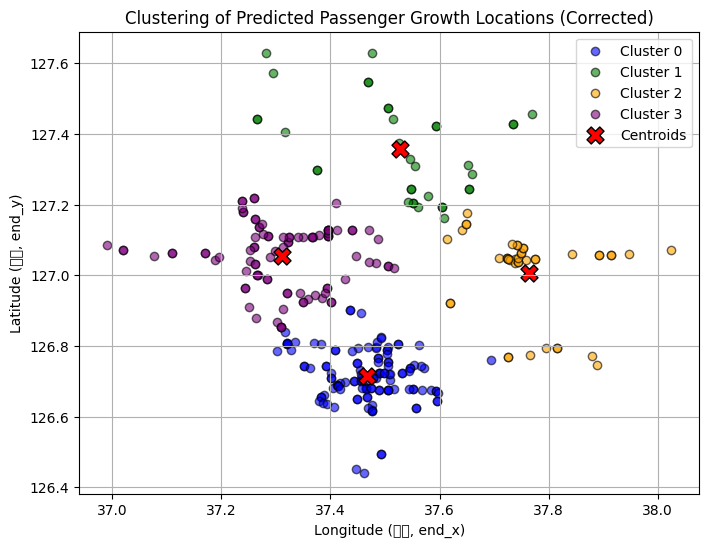

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 📌 1. CSV 파일 로드
file_path = "/root/ML_method/2025_climate_pass_1_predicted_fixed.csv"
df = pd.read_csv(file_path)

# 📌 2. 클러스터링에 사용할 좌표값 추출 (경도: end_x, 위도: end_y)
X = df[['end_x', 'end_y']].dropna()

# 📌 3. K-Means 모델 설정 (클러스터 개수 = 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# 📌 4. 클러스터링 결과 시각화 (경도: X축, 위도: Y축)
plt.figure(figsize=(8, 6))

# 고유한 색상 리스트 (선명한 컬러 사용)
colors = ['blue', 'green', 'orange', 'purple']

# 클러스터별 데이터 플롯
for cluster_id, color in zip(sorted(df['cluster'].unique()), colors):
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['end_x'], cluster_points['end_y'], 
                label=f'Cluster {cluster_id}', color=color, alpha=0.6, edgecolors='black')

# 📌 5. 클러스터 중심점 (Centroids) 표시
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=150, label='Centroids', edgecolors='black')

# 📌 6. 그래프 설정
plt.xlabel('Longitude (경도, end_x)')
plt.ylabel('Latitude (위도, end_y)')
plt.title('Clustering of Predicted Passenger Growth Locations (Corrected)')
plt.legend()
plt.grid(True)
plt.show()


findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum

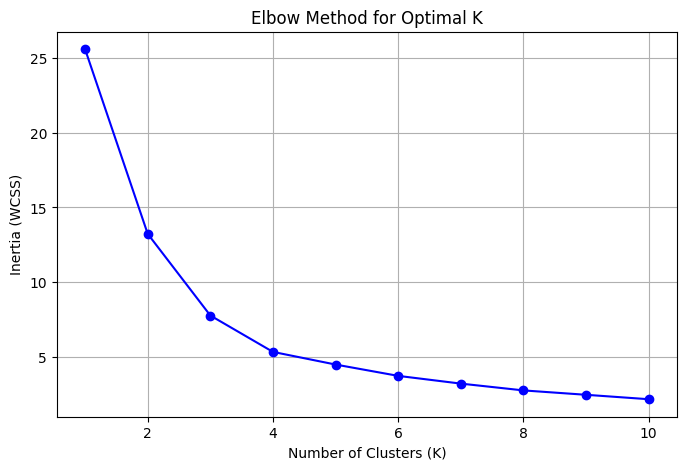

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 개수를 1~10까지 바꿔가며 K-Means 실행
inertia = []
X = df[['end_x', 'end_y']].dropna()

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: 

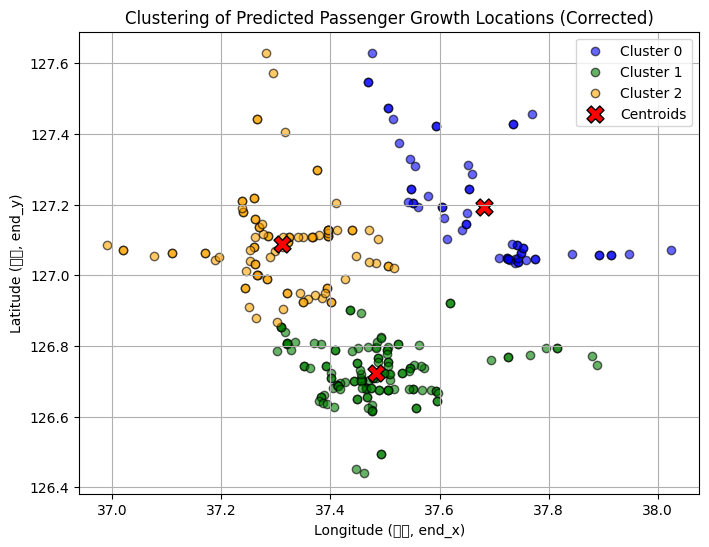

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 📌 1. CSV 파일 로드
file_path = "/root/ML_method/2025_climate_pass_1_predicted_fixed.csv"
df = pd.read_csv(file_path)

# 📌 2. 클러스터링에 사용할 좌표값 추출 (경도: end_x, 위도: end_y)
X = df[['end_x', 'end_y']].dropna()

# 📌 3. K-Means 모델 설정 (클러스터 개수 = 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# 📌 4. 클러스터링 결과 시각화 (경도: X축, 위도: Y축)
plt.figure(figsize=(8, 6))

# 고유한 색상 리스트 (선명한 컬러 사용)
colors = ['blue', 'green', 'orange', 'purple']

# 클러스터별 데이터 플롯
for cluster_id, color in zip(sorted(df['cluster'].unique()), colors):
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['end_x'], cluster_points['end_y'], 
                label=f'Cluster {cluster_id}', color=color, alpha=0.6, edgecolors='black')

# 📌 5. 클러스터 중심점 (Centroids) 표시
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=150, label='Centroids', edgecolors='black')

# 📌 6. 그래프 설정
plt.xlabel('Longitude (경도, end_x)')
plt.ylabel('Latitude (위도, end_y)')
plt.title('Clustering of Predicted Passenger Growth Locations (Corrected)')
plt.legend()
plt.grid(True)
plt.show()


findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: Font family 'Nanum Barun Gothic' not found.
findfont: 

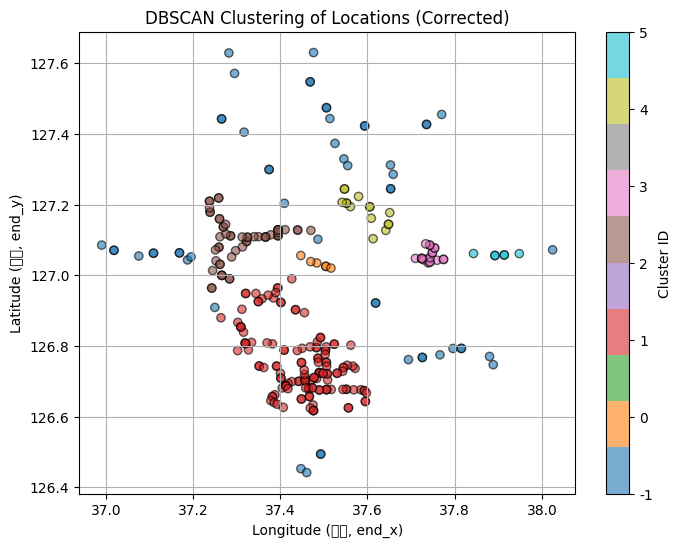

In [150]:
from sklearn.cluster import DBSCAN

# 📌 1. DBSCAN 모델 실행 (eps=0.01, min_samples=5는 조정 가능)
dbscan = DBSCAN(eps=0.05, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

# 📌 2. DBSCAN 결과 시각화 (경도: X축, 위도: Y축)
plt.figure(figsize=(8, 6))
plt.scatter(df['end_x'], df['end_y'], c=df['dbscan_cluster'], cmap='tab10', alpha=0.6, edgecolors='black')

# 📌 3. 그래프 설정
plt.xlabel('Longitude (경도, end_x)')
plt.ylabel('Latitude (위도, end_y)')
plt.title('DBSCAN Clustering of Locations (Corrected)')
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

In [154]:
import folium

# 📌 1. 지도 중심 좌표를 데이터 평균으로 설정 (경도: end_x, 위도: end_y)
center_lon, center_lat = df['end_y'].mean(), df['end_x'].mean()

# 📌 2. Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# 📌 3. 클러스터별 색상 정의 (DBSCAN은 클러스터 개수가 미정이므로 더 많은 색상 활용)
colors = ['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray']

# 📌 4. 각 지점에 마커 추가
for idx, row in df.iterrows():
    cluster_id = row['dbscan_cluster']
    
    # 클러스터 -1은 이상치(Noise) → 검은색 처리
    if cluster_id == -1:
        color = 'black'
    else:
        color = colors[cluster_id % len(colors)]  # 색상 순환 적용

    folium.CircleMarker(
        location=[row['end_x'], row['end_y']],  # 위도, 경도 순서로 설정
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"DBSCAN Cluster {cluster_id}"
    ).add_to(m)

# 📌 5. 지도 출력
m